In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from functions import load_data, replace_missing_long, widen_data, feature_engineering, normalize_data

## Task 1: Data Preparation

### Task 1A: Exploratory Data Analysis

Start with exploring the raw data that is available:
- Notice all sorts of properties of the dataset: how many records are there, how many
attributes, what kinds of attributes are there, ranges of values, distribution of values,
relationships between attributes, missing values, and so on. A table is often a suitable
way of showing such properties of a dataset. Notice if something is interesting (to you,
or in general), make sure you write it down if you find something worth mentioning.
- Make various plots of the data. Is there something interesting worth reporting? Re-
port the figures, discuss what is in them. What meaning do those bars, lines, dots, etc.
convey? Please select essential and interesting plots for discussion, as you have limited
space for reporting your findings.

### our answers:
Entries: 376912, of which 202 have missing value for the column'value'.

In [30]:
# read csv dataset with first column 
data = load_data()
data

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [31]:
data.isnull().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

In [32]:
# Show the variables with the missing values
data[data.isnull().any(axis=1)].variable.unique()

array(['circumplex.arousal', 'circumplex.valence'], dtype=object)

In [33]:
# plot the distribution of every variable
for i in data.variable.unique():
    sns.distplot(data[data.variable == i].value)
    plt.title(i)
    # add labels
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    # Set the y-axis to logarithmic scale
    plt.gca().set_yscale('log')
    
    # Save the plot
    plt.savefig('plots/distribution/' + i + '.png')
    
    plt.clf()  # Clear the current figure

/Users/timmooren/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/timmooren/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/timmooren/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

<Figure size 640x480 with 0 Axes>

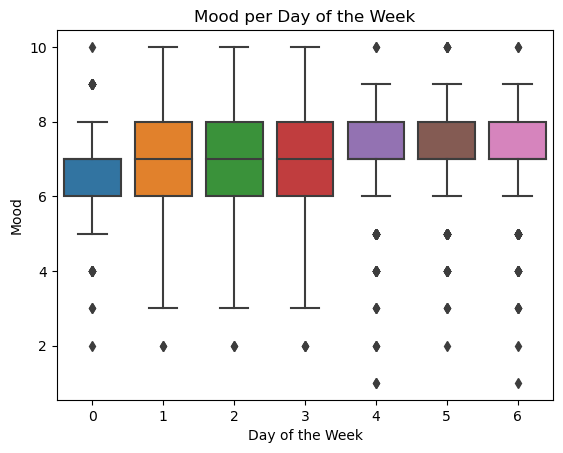

In [34]:
# horizontal boxplot the mood for every day of the week (0 = monday, 6 = sunday) and label the x axis with the day of the week
sns.boxplot(data=data[data.variable == 'mood'], x=data[data.variable == 'mood'].time.dt.dayofweek, y='value')
plt.title('Mood per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mood')
plt.savefig('plots/mood_dayofweek.png')

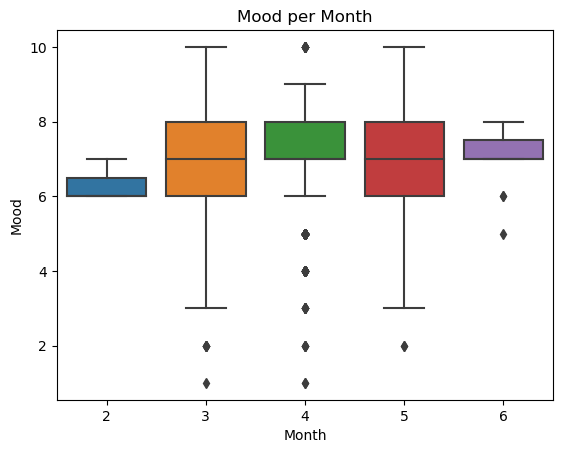

In [35]:
# mood per month
sns.boxplot(data=data[data.variable == 'mood'], x=data[data.variable == 'mood'].time.dt.month, y='value')
plt.title('Mood per Month')
plt.xlabel('Month')
plt.ylabel('Mood')
plt.savefig('plots/mood_month.png')

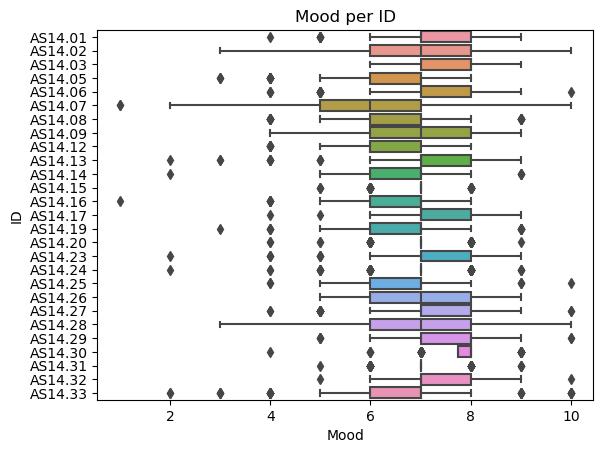

In [36]:
# horizontal boxplot of mood per id
sns.boxplot(data=data[data.variable == 'mood'], x='value', y='id')
plt.title('Mood per ID')
plt.xlabel('Mood')
plt.ylabel('ID')
plt.savefig('plots/mood_id.png')

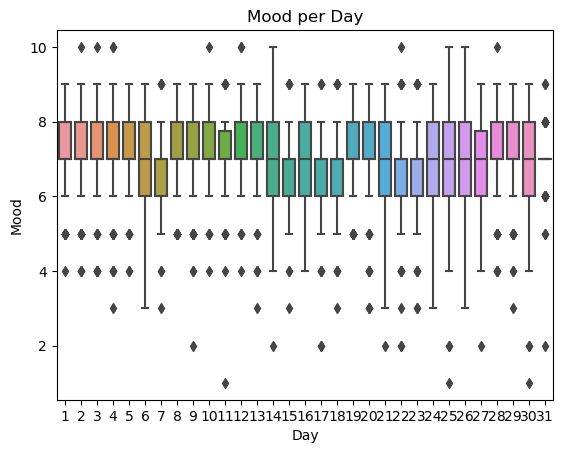

In [37]:
# mood per day
sns.boxplot(data=data[data.variable == 'mood'], x=data[data.variable == 'mood'].time.dt.day, y='value')
plt.title('Mood per Day')
plt.xlabel('Day')
plt.ylabel('Mood')
plt.savefig('plots/mood_day.png')

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

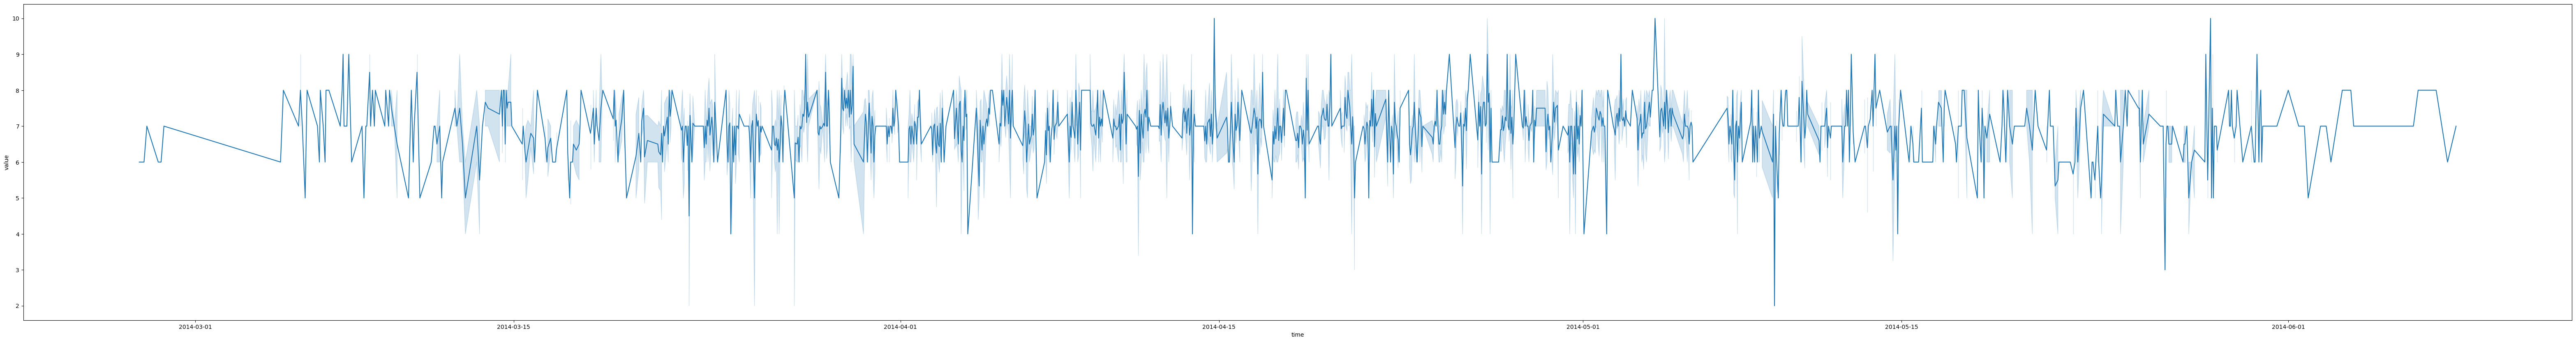

In [38]:
# plot mood over time and add regression line
plt.figure(figsize=(80, 10))
sns.lineplot(data=data[data.variable == 'mood'], x='time', y='value')
sns.regplot(data=data[data.variable == 'mood'], x='time', y='value', scatter=False, color='red')
plt.title('Mood over Time')
plt.xlabel('Time')
plt.ylabel('Mood')
plt.savefig('plots/mood_time.png')

### Task 1B: Data cleaning

In [39]:
# replace missing values with the mean of the variable for that id and day
# data['value'] = data.groupby(['id', 'variable', data['time'].dt.date])['value'].transform(lambda x: x.fillna(x.mean()))
# # replace missing values with the mean of the variable for that id
data['value'] = data.groupby(['id', 'variable'])['value'].transform(lambda x: x.fillna(x.mean()))
data

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [ ]:
# transform the data to wide format
data = widen_data(data)
# Extract hour and day information from the 'time' column
data['hour'] = data['time'].dt.hour
data['day'] = data['time'].dt.dayofweek

data

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,hour,day
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,12,0
1,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,18,0
2,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9,1
3,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,14,2
4,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358921,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,4
358922,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,4
358923,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,4
358924,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,4


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
activity,22965.0,0.115958,0.186946,0.000,0.00000,0.021739,0.158333,1.000
appCat.builtin,91288.0,18.538262,415.989243,-82798.871,2.02000,4.038000,9.922000,33960.246
appCat.communication,74276.0,43.343792,128.912750,0.006,5.21800,16.225500,45.475750,9830.777
appCat.entertainment,27125.0,37.576480,262.960476,-0.011,1.33400,3.391000,14.922000,32148.677
appCat.finance,939.0,21.755251,39.218361,0.131,4.07200,8.026000,20.155000,355.513
appCat.game,813.0,128.391615,327.145246,1.003,14.14800,43.168000,123.625000,5491.793
appCat.office,5642.0,22.578892,449.601382,0.003,2.00400,3.106000,8.043750,32708.818
appCat.other,7650.0,25.810839,112.781355,0.014,7.01900,10.028000,16.829250,3892.038
appCat.social,19145.0,72.401906,261.551846,0.094,9.03000,28.466000,75.372000,30000.906


In [ ]:
data

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,hour,day
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,12,0
1,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,18,0
2,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9,1
3,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,14,2
4,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358921,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,4
358922,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,4
358923,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,4
358924,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,4


In [ ]:
# replace the missing values with 0
# data_wide = data_wide.fillna(0)

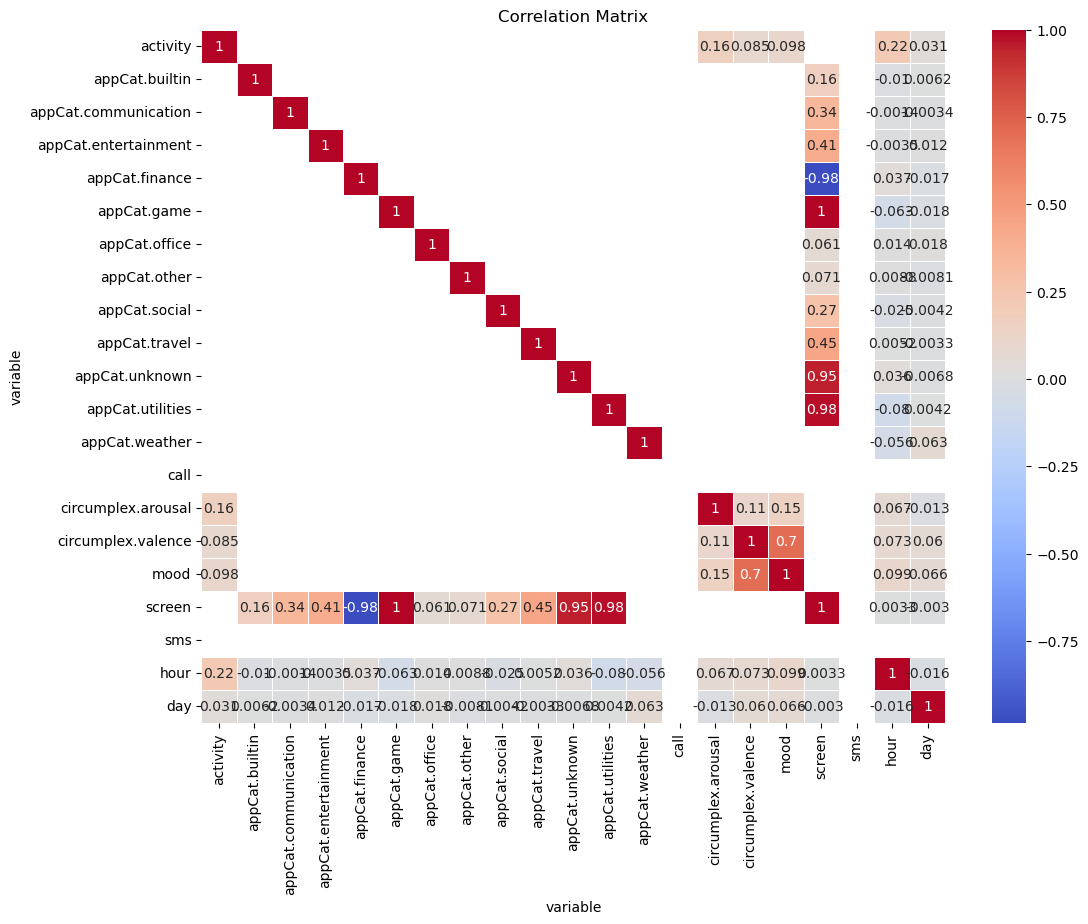

In [ ]:
corr = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# # remove rows where appCat.builtin and appCat.entertainment	are negative
# data_wide = data_wide[(data_wide['appCat.builtin'] >= 0) & (data_wide['appCat.entertainment'] >= 0)]
# data_wide

In [ ]:
# sum variables
sum_vars = ['appCat.builtin', 'appCat.communication', 'appCat.entertainment', 
                 'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 
                 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 
                 'appCat.weather', 'screen']
# mean variables
mean_vars = ['circumplex.arousal', 'circumplex.valence', 'activity', 'mood']

# group the wide data by day and id and aggregate the sum and mean of the variables
grouped_wide = data.groupby(pd.Grouper(key='time', freq='D')).agg({**{var: 'sum' for var in sum_vars}, **{var: 'mean' for var in mean_vars}})
grouped_wide

variable,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,screen,circumplex.arousal,circumplex.valence,activity,mood
time,,,,,,,,,,,,,,,,,
2014-02-17,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000000,NaN,NaN,NaN,NaN
2014-02-18,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000000,NaN,NaN,NaN,NaN
2014-02-19,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000000,NaN,NaN,NaN,NaN
2014-02-20,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000000,NaN,NaN,NaN,NaN
2014-02-21,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-05,1749.277,958.821,0.0,0.0,0.0,0.0,47.360,171.964,225.737,0.0,0.000,0.0,2371.588999,0.0,1.0,0.152343,7.0
2014-06-06,945.898,1710.924,0.0,0.0,0.0,0.0,36.414,0.000,0.000,0.0,2.072,0.0,2733.332000,0.5,1.0,0.189476,7.5
2014-06-07,5027.498,735.965,0.0,0.0,0.0,0.0,6.214,106.850,0.000,0.0,0.000,0.0,5530.377999,-1.0,NaN,0.081893,8.0


In [ ]:
# show data for one id and one day
grouped_wide.sample(1)

,variable,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,screen,circumplex.arousal,circumplex.valence,activity,mood,appCat.sum
time,id,,,,,,,,,,,,,,,,,,
2014-04-05,AS14.28,2074.759,1473.532,414.386,0.0,304.83,0.0,88.969,2144.604,0.0,8.355,545.14,5.05,7930.456998,-0.8,0.8,0.02786,7.6,14990.081998


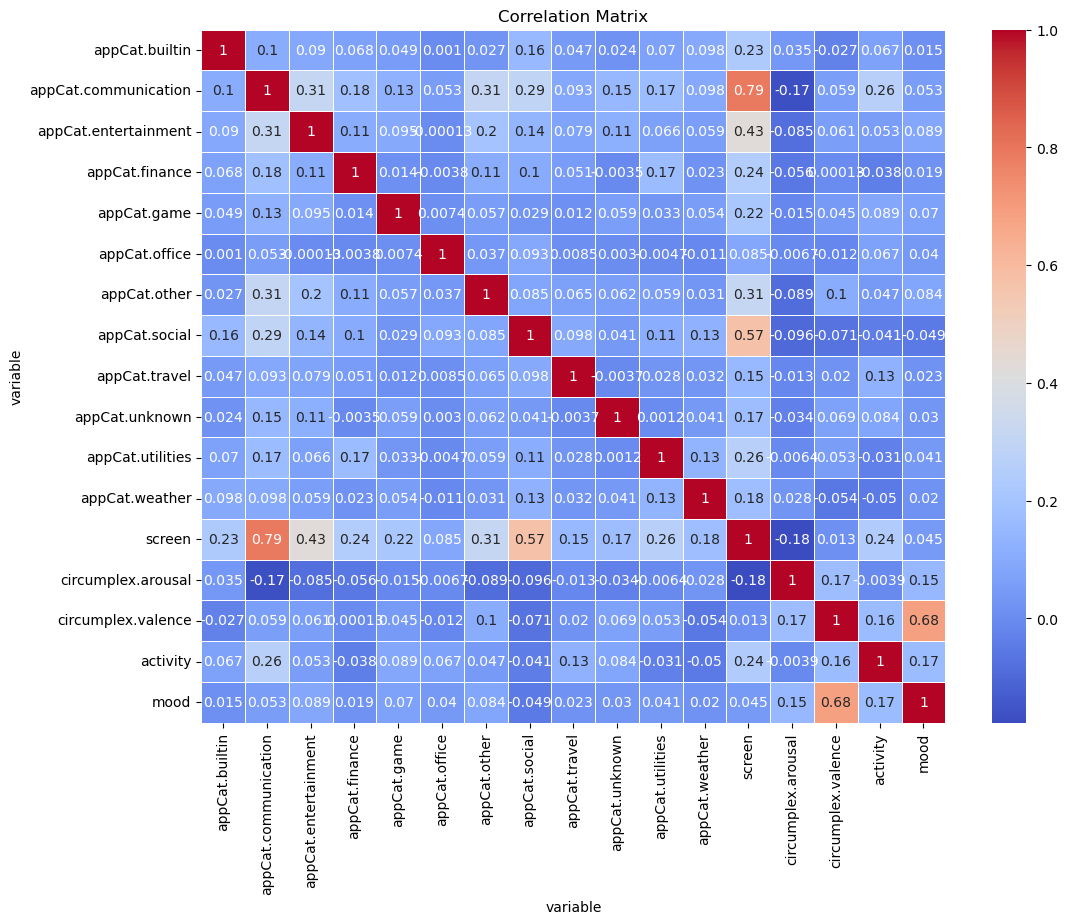

In [ ]:
# correlation matrix of the aggregated variables
corr = grouped_wide.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from itertools import cycle

palette = sns.color_palette("husl", n_colors=len(data.id.unique()))
color_cycle = cycle(palette)

for i in data.id.unique():
    current_color = next(color_cycle)
    plt.figure(figsize=(12, 6)) 
    sns.lineplot(
        data=data[data.id == i], 
        x='time', 
        y='mood', 
        color=current_color, 
        marker='o',  # Show data points as dots
        linestyle='--'  # Make the lines dashed
    )
    plt.title(i)
    plt.savefig('plots/timeseries/' + i + '.png')
    plt.clf()

/var/folders/cl/gr0w_0nd5b98g5nsjqhms9t40000gn/T/ipykernel_12738/4256415568.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
# for every variable, plot the distribution
vars = ['mood']
for var in vars:
    if var not in ['id', 'time']:
        sns.histplot(data, x=var, kde=True)
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')
        # save plot
        plt.savefig('plots/distribution/' + var + '.png')
        plt.clf()

<Figure size 640x480 with 0 Axes>